# <b><i><center><h3> Data Analysis and Machine Learning on Spotify Tracks Dataset

- <b><h4> Objective:
- <b> The goal is to predict whether a song will be popular based on audio features such as danceability, energy, and loudness using classification techniques.

## <b><i><center> Model Function 

In [38]:
def Models(df, target_column, test_size, tuning):
    import pandas as pd
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import f1_score
    
    data = df.copy()

    X = data.drop(columns=target_column)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    if tuning:
        models = {
            'Decision Tree Classifier': (DecisionTreeClassifier(), {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }),
            'Random Forest Classifier': (RandomForestClassifier(), {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            })
        }
    else:
        models = {
            'Logistic Regression': LogisticRegression(),
            'Support Vector Classifier': SVC(),
            'Decision Tree Classifier': DecisionTreeClassifier(),
            'Random Forest Classifier': RandomForestClassifier()
        }
    
    results = {}
    for name, model_info in models.items():
        if tuning:

            model, param_grid = model_info
            grid_search = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=5)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:

            best_model = model_info
            best_model.fit(X_train, y_train)

        predictions = best_model.predict(X_test)
        
        training_score = best_model.score(X_train, y_train)
        testing_score = best_model.score(X_test, y_test)
        f1Score = f1_score(y_true=y_test, y_pred=predictions)
        
        results[name] = {
            'F1 Score': f1Score,
            'Training Accuracy': testing_score,
            'Testing Accuracy': training_score
        }
    return pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})


## <b><i><center> Model Evaluation Function 

In [41]:
def plot_metric(result):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style('darkgrid')
    
    
    df_melted = result.melt(id_vars='Model', var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(13, 7))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', padding=3)

    plt.title('Model Evaluation Metric', fontsize=16, weight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score (Log Scale)', fontsize=12)
    plt.xticks(rotation=15, fontsize=10)
    plt.legend(title='Metric', loc='best', fontsize=10)
    
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

## <b><i><center> Importing Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# <b><i><center> Importing Dataset

#### <b><i>Step 1: Load the Data

In [4]:
data = pd.read_csv("./Spotify Tracks Dataset.csv", index_col='Unnamed: 0')
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
data.shape

(114000, 20)

In [6]:
data.drop(columns=['track_id'], inplace=True)

In [7]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             114000 

#### <b><i>Step 2: Data Cleaning

In [9]:
data.isna().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data = data[~data.duplicated()]

In [12]:
data['artists'].unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [13]:
len(data['album_name'].unique())

46589

#### <b><i>Step 3: Exploratory Data Analysis (EDA)

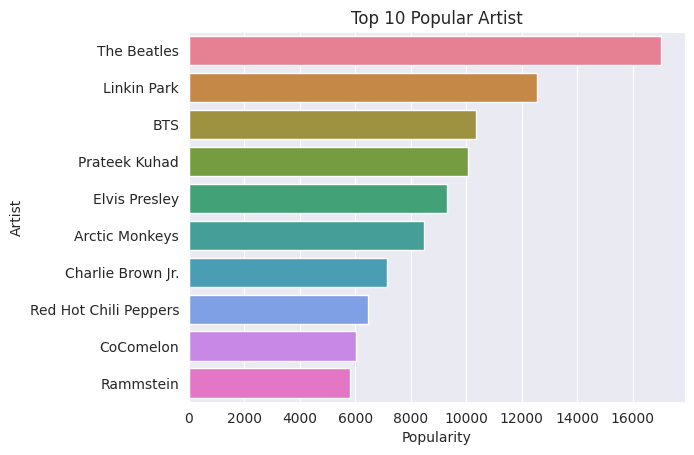

In [14]:
top_10_artist = data.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_10_artist, x='popularity', y='artists', palette='husl')
plt.xlabel("Popularity")
plt.ylabel("Artist")
plt.title("Top 10 Popular Artist")
plt.show()

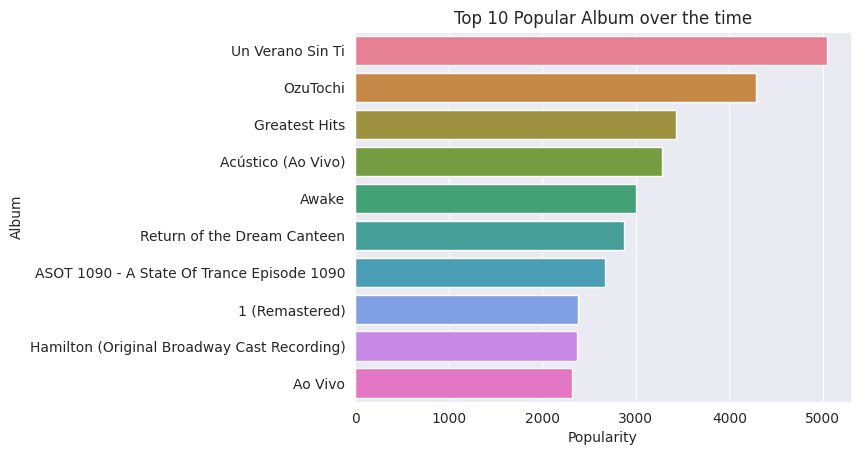

In [15]:
top_10_album = data.groupby('album_name')['popularity'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_10_album, x='popularity', y='album_name', palette='husl')
plt.xlabel("Popularity")
plt.ylabel("Album")
plt.title("Top 10 Popular Album over the time")
plt.show()

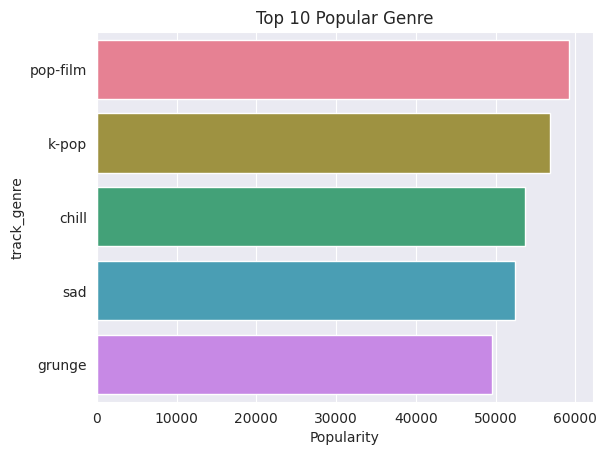

In [16]:
top_10_genre = data.groupby('track_genre')['popularity'].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data=top_10_genre, x='popularity', y='track_genre', palette='husl')
plt.xlabel("Popularity")
plt.ylabel("track_genre")
plt.title("Top 10 Popular Genre")
plt.show()

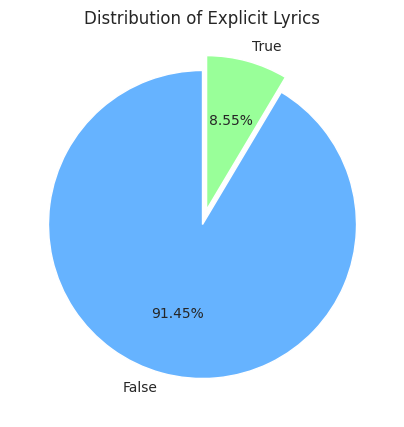

In [17]:
values, counts = np.unique(data['explicit'], return_counts=True)
plt.figure(figsize=(5, 5))
explode = [0, 0.1]
colors = ['#66b3ff','#99ff99']
plt.pie(counts, labels=values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribution of Explicit Lyrics')
plt.show()

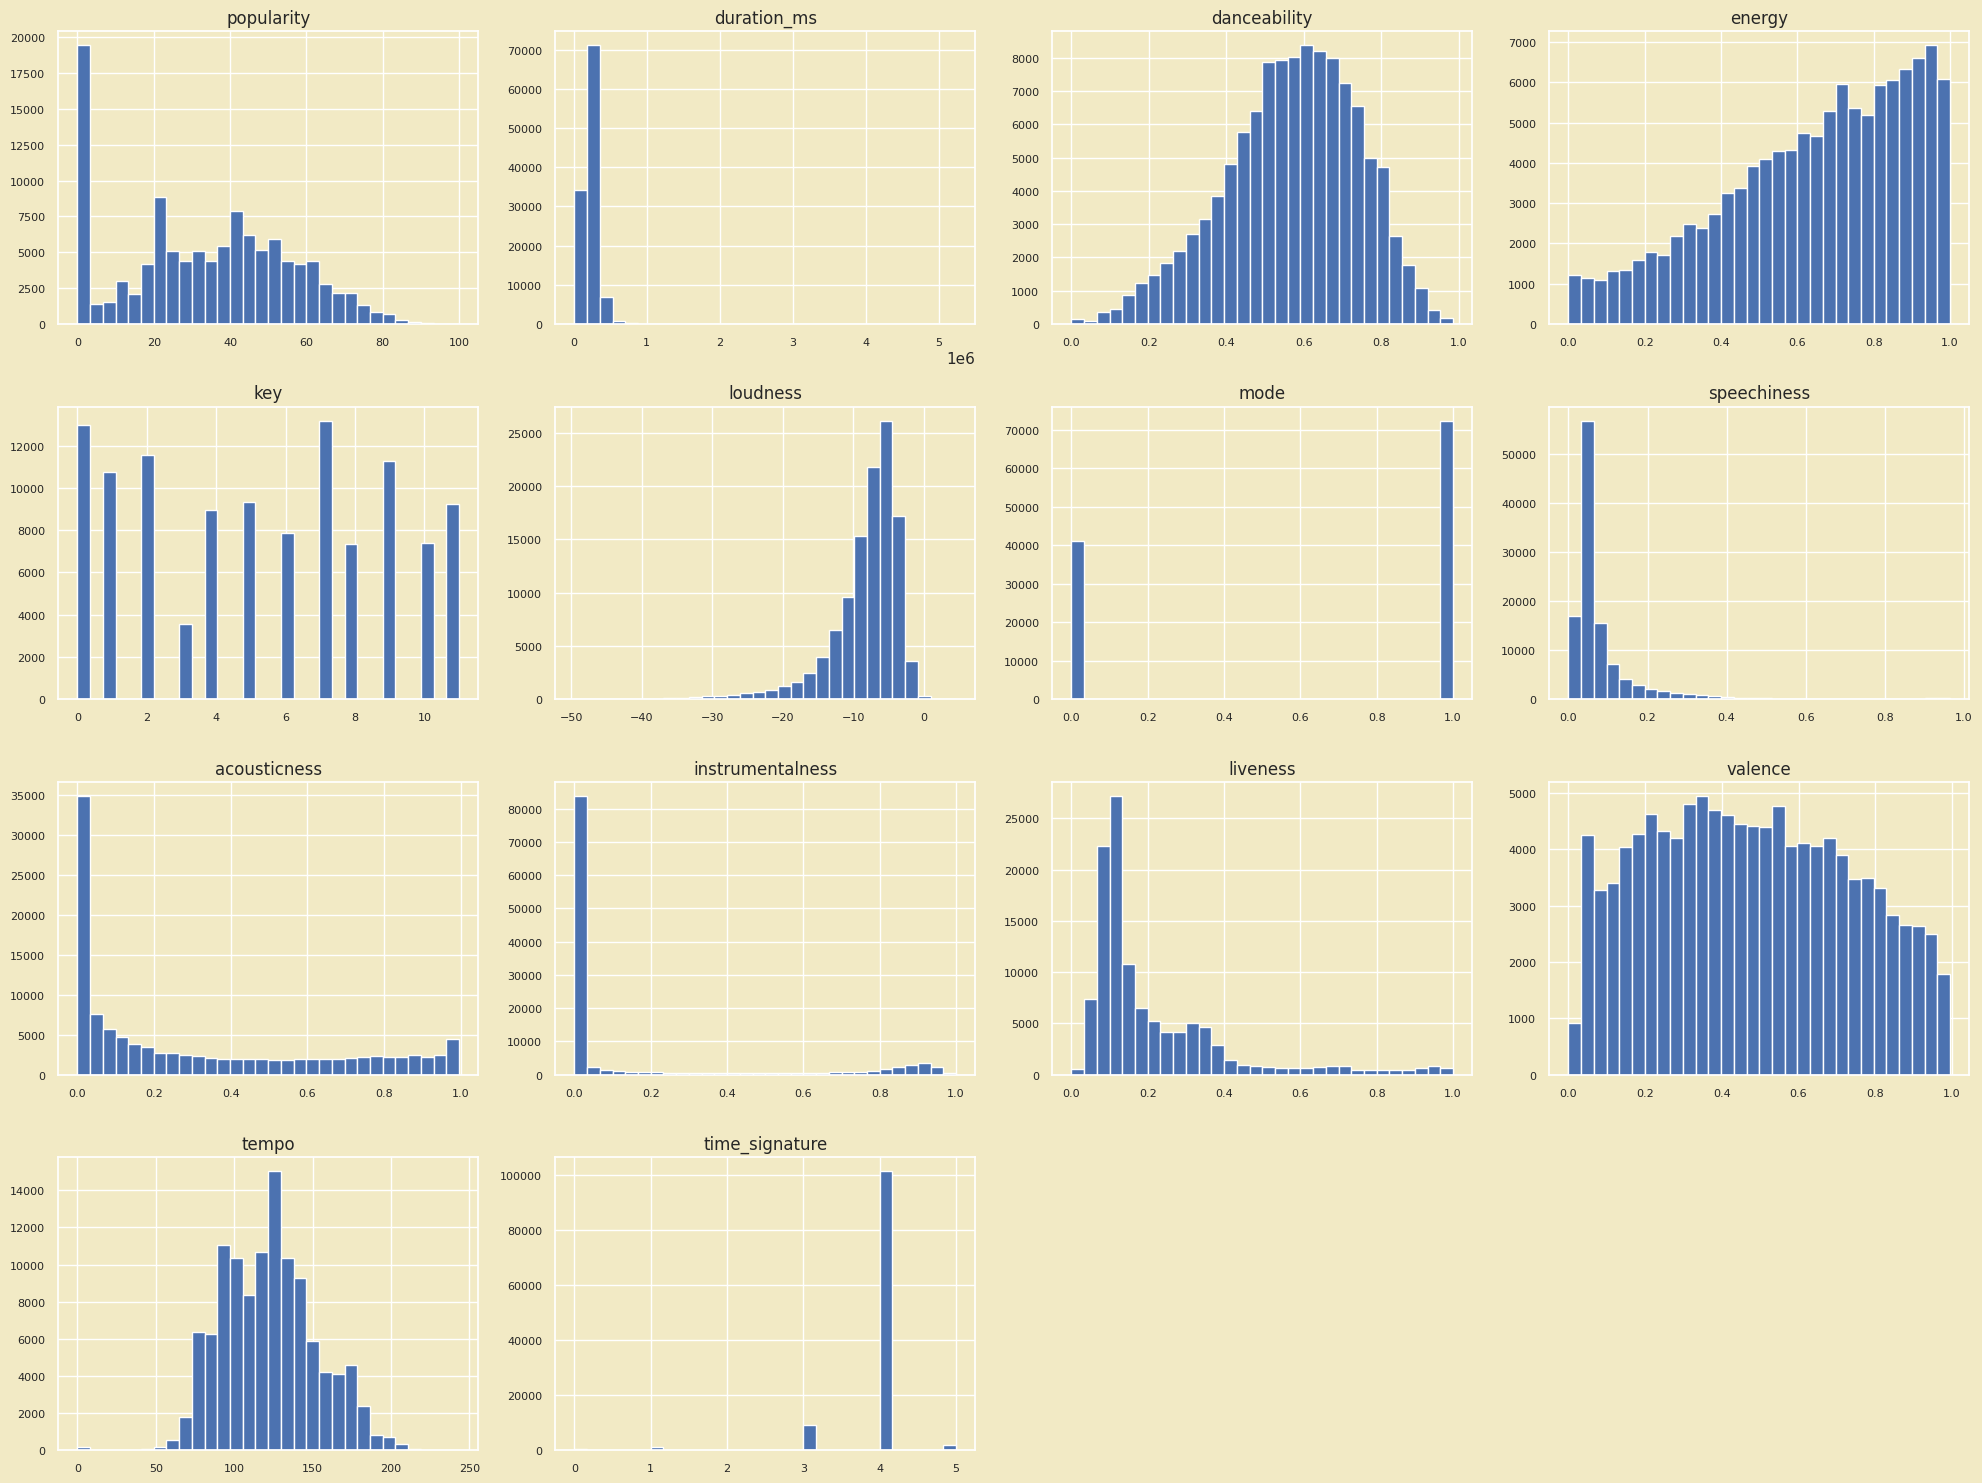

In [18]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
data.select_dtypes(exclude=['object', 'bool']).hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

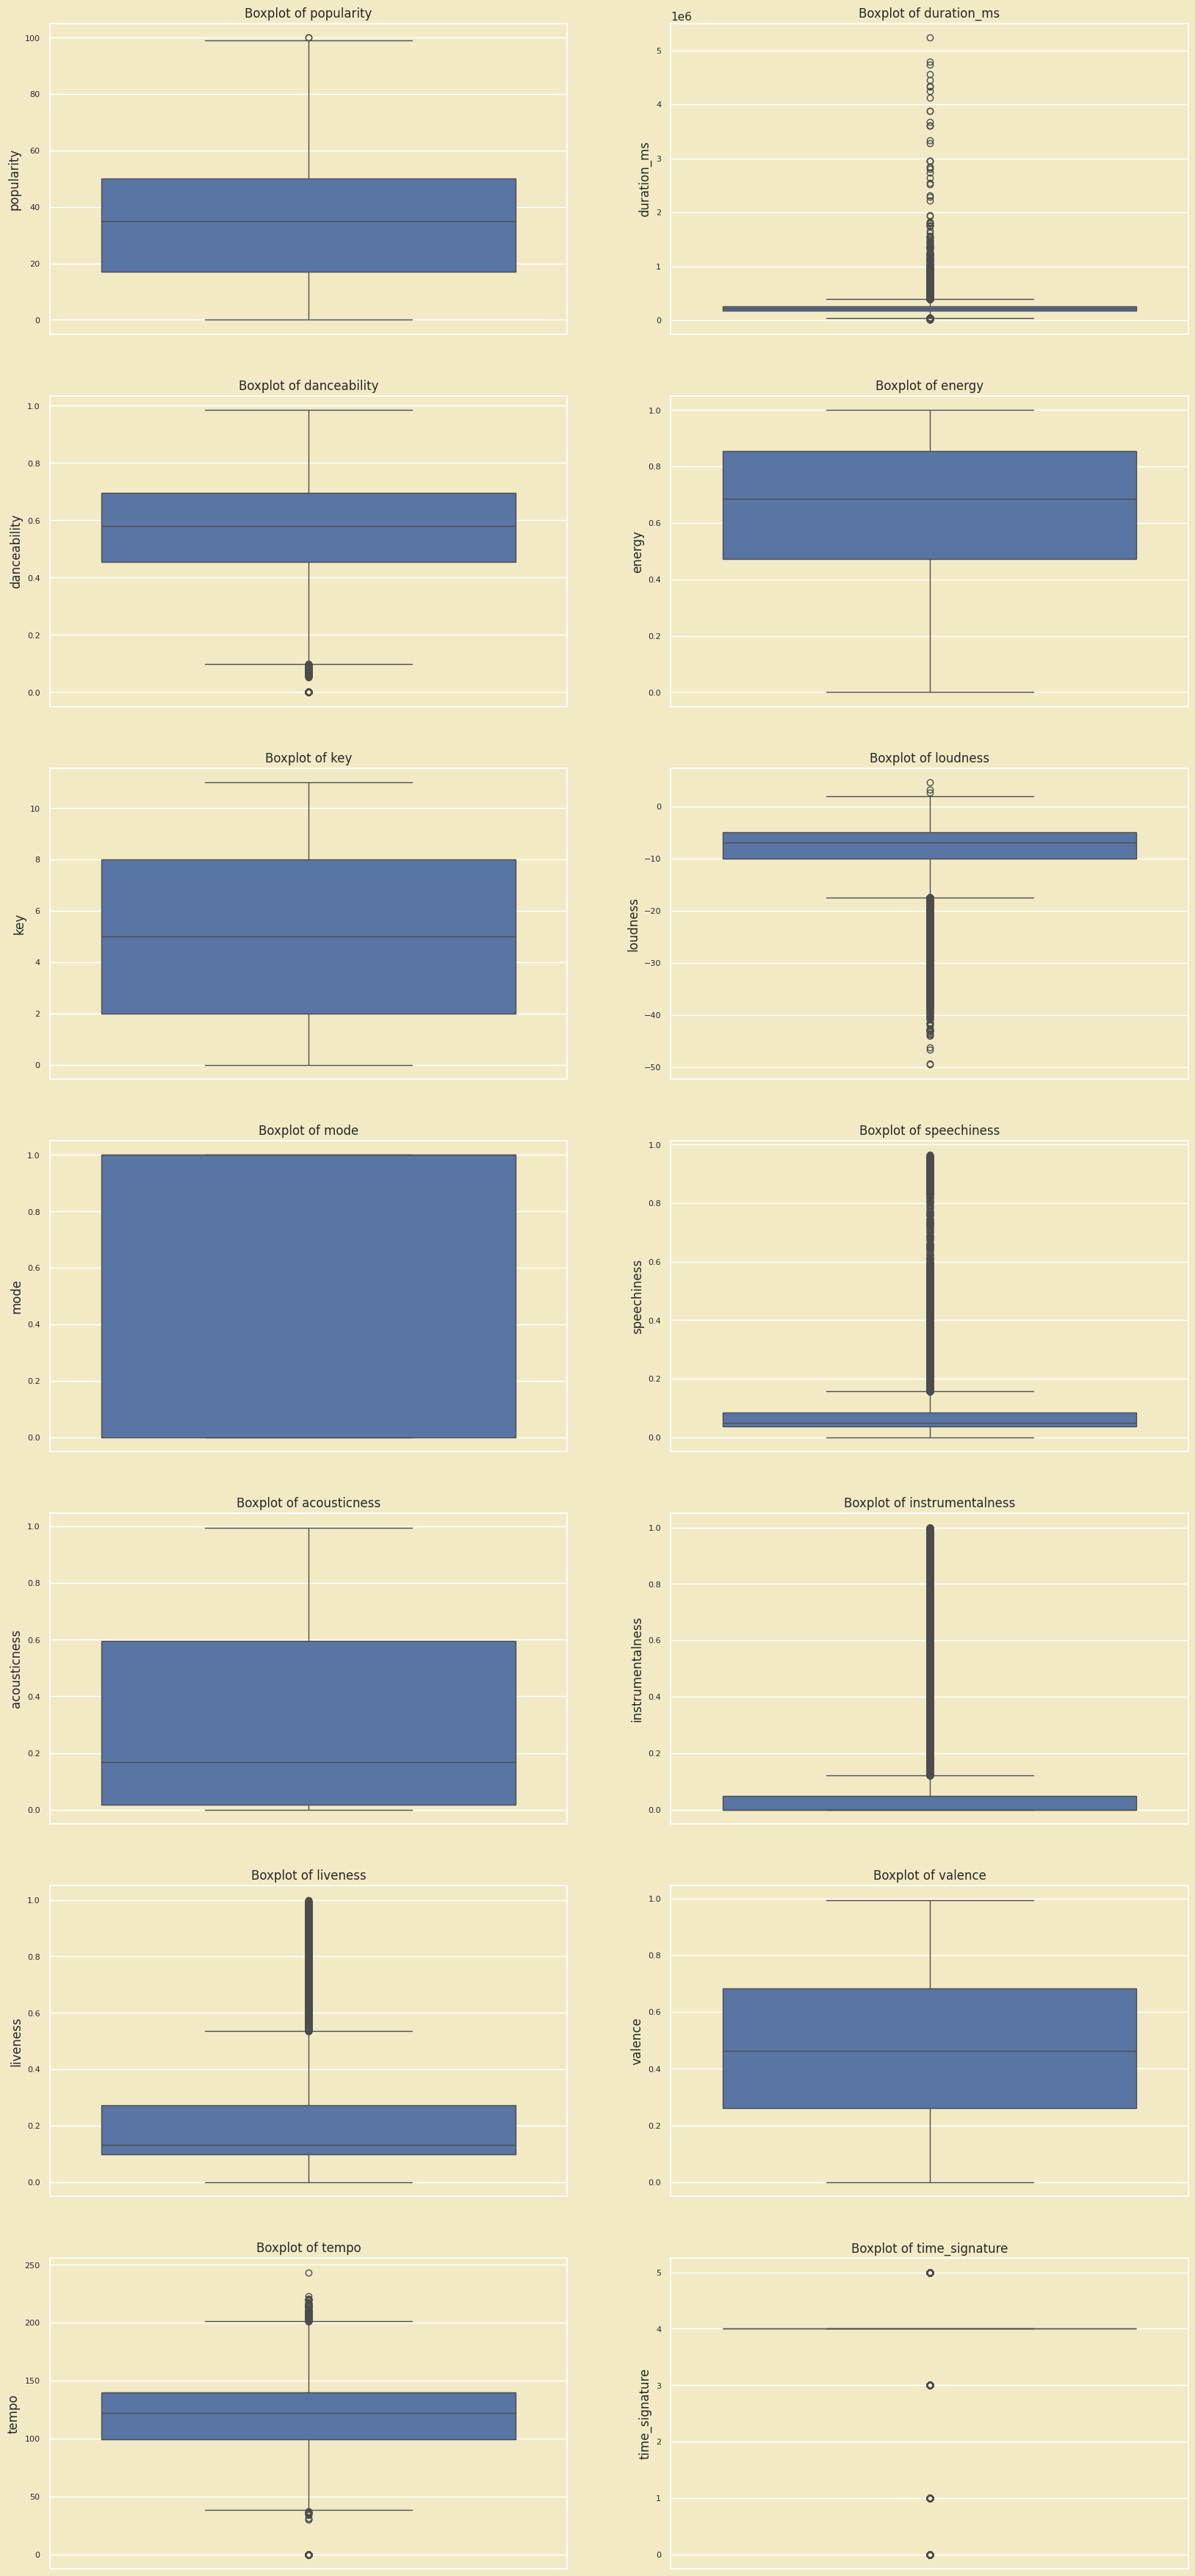

In [19]:
numerical_cols = data.select_dtypes(exclude=['object', 'bool'])
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

num_cols = len(numerical_cols.columns)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 45))
axes = axes.flatten()

for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(y=numerical_cols[col], ax=axes[i])
    axes[i].set_title("Boxplot of" + " " + col)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    

In [20]:
data.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

#### <b><i>Step 4: Feature Engineering

In [21]:
data['is_popular'] = data['popularity'].apply(lambda x: 1 if x>=60 else 0)

In [22]:
data.drop(columns=['artists', 'album_name', 'track_name', 'track_genre'], inplace=True)

In [23]:
data['energy_level'] = pd.cut(data['energy'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', "High"]).apply(lambda x: 0 if x == 'Low' else '1' if x == 'Medium' else 2)

In [24]:
data['danceability_energy_ratio'] = data['danceability'] / data['energy']

In [25]:
data['explicit'] = data['explicit'].astype(int)

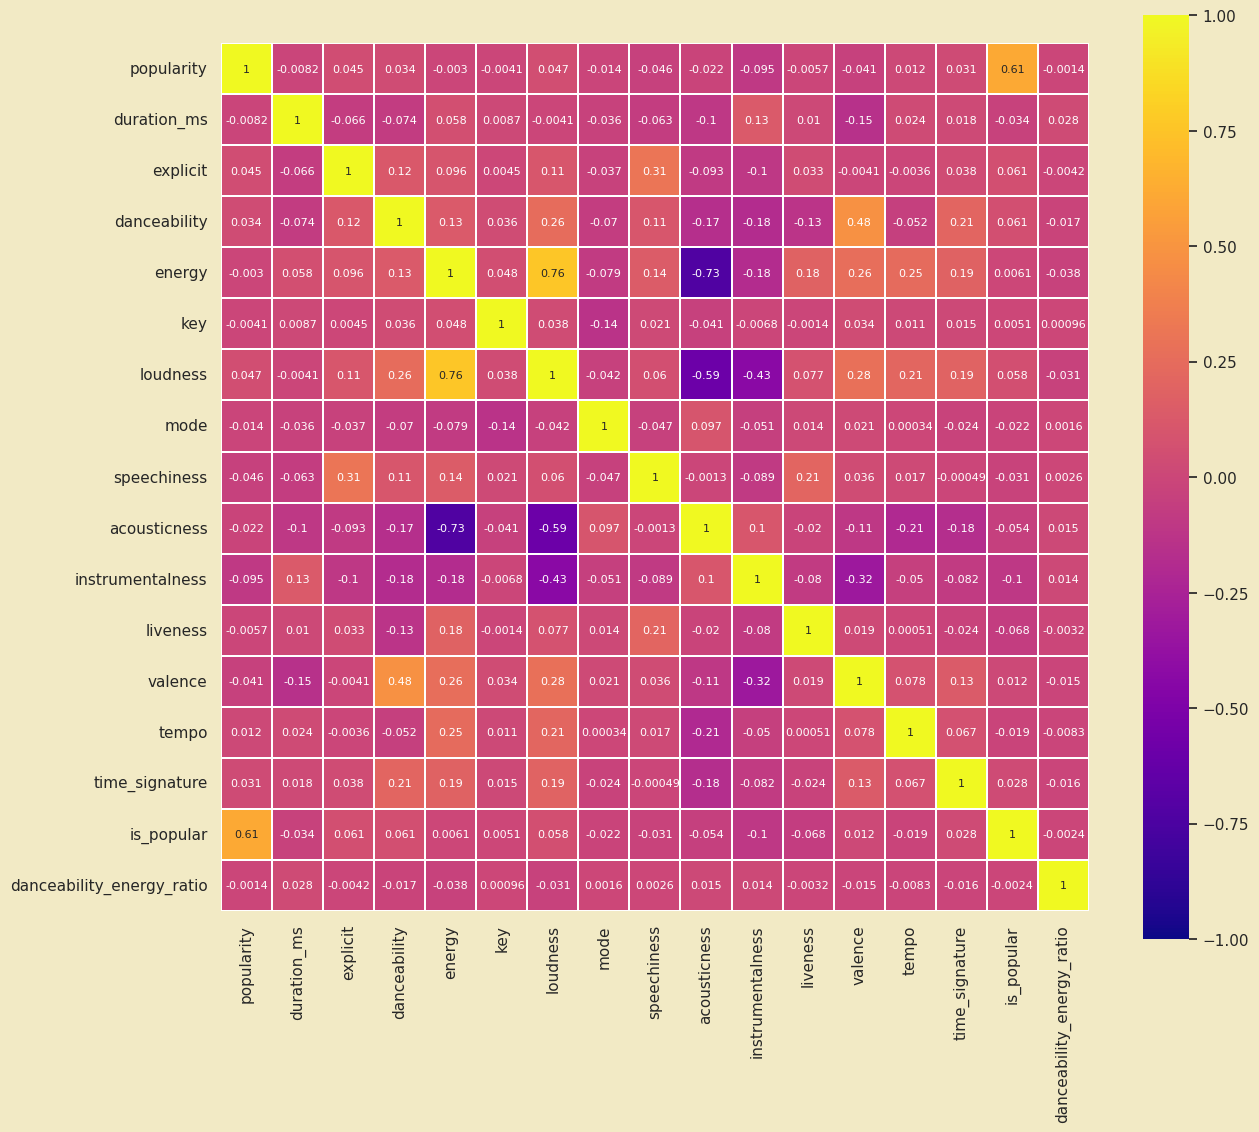

In [26]:
numerical_cols = data.select_dtypes(include=['number'])
corr_mat = numerical_cols.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat, vmax = 1, vmin = -1, square=True, cmap='plasma', annot = True, annot_kws={"size": 8}, linewidths=0.1);
plt.show()

In [27]:
data.dropna(inplace=True)

In [28]:
data['energy_level'] = data['energy_level'].astype(int)

#### <b><i>Step 5: Splitting the Data

In [29]:
X = data.drop(columns=['is_popular'])
y = data['is_popular']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

#### <b><i>Step 6: Applying a Machine Learning Model

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

#### <b><i>Step 7: Model Evaluation

In [33]:
print(classification_report(y_true=y_test, y_pred=model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



#### <b><i>Step 5 to Step 8 in just two function.

##### <i> No Fine Tuning

In [34]:
result = Models(data, 'is_popular', 0.2, False)

In [35]:
result

,Model,F1 Score,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.739015,0.930879,0.932552
1,Support Vector Classifier,0.000000,0.868195,0.869710
2,Decision Tree Classifier,1.000000,1.000000,1.000000
3,Random Forest Classifier,1.000000,1.000000,1.000000


#### <b><i>Step 8: Model Evaluation

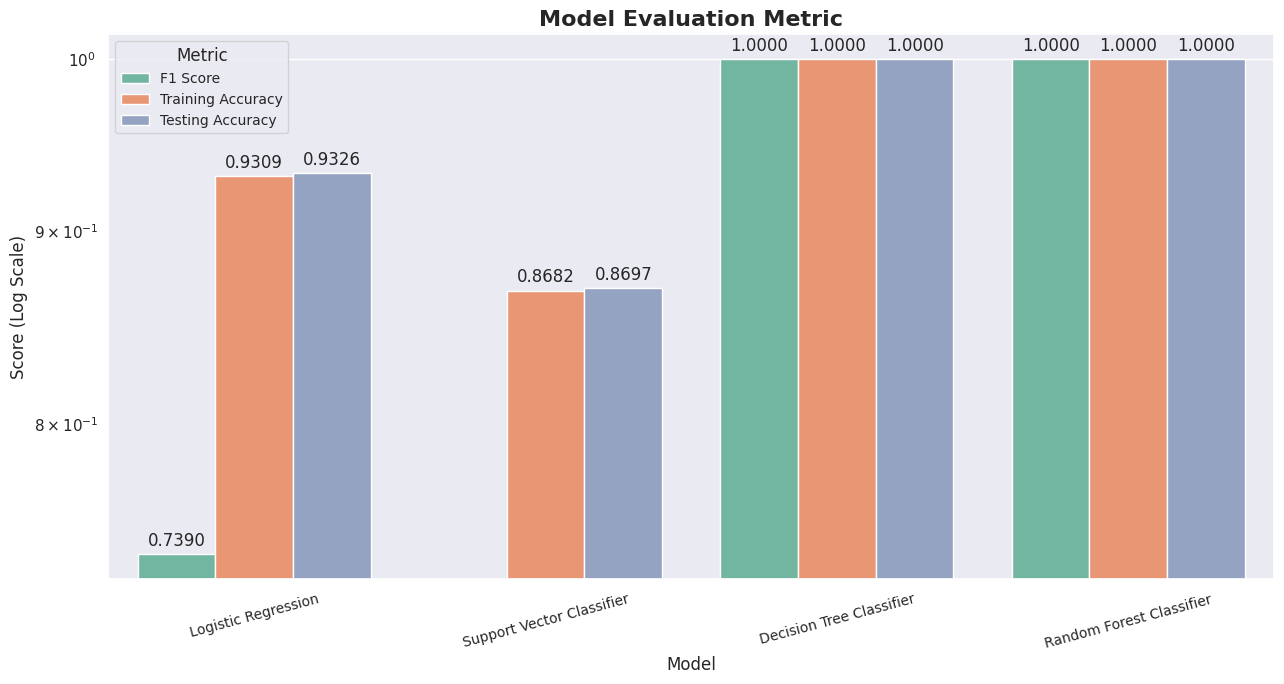

In [42]:
plot_metric(result)

##### <i> With Fine Tuning

In [43]:
# result = Models(data, 'is_popular', 0.2, True) # Will take too much time

In [44]:
# result

In [45]:
# plot_metric(result)